## **Multivariate multi-step encoder-decoder lstm example**

In [1]:
# Code to load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Oct 29 14:11:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import Data
import numpy as np
import h5py
from sklearn.preprocessing import MinMaxScaler

mat_var_0_03_train_02 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/Position_Data_test_var_0_03_test_01.mat','r')
mat_var_0_03_train_03 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/Position_Data_test_var_0_03_test_02.mat','r')
#mat_var_0_08 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/Position_Data_test_var_0_03_test_03.mat','r')
#mat_var_0_08 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/Position_Data_test_var_0_03_test_04.mat','r')

# Load Data
traj1_no_noise = np.array(mat_var_0_03_train_02['Traj1'])
traj2_no_noise = np.array(mat_var_0_03_train_02['Traj2'])
traj3_no_noise = np.array(mat_var_0_03_train_02['Traj3'])
traj4_no_noise = np.array(mat_var_0_03_train_02['Traj4'])
traj5_no_noise = np.array(mat_var_0_03_train_02['Traj5'])
traj6_no_noise = np.array(mat_var_0_03_train_02['Traj6'])
traj7_no_noise = np.array(mat_var_0_03_train_02['Traj7'])
traj8_no_noise = np.array(mat_var_0_03_train_02['Traj8'])
traj1_var_0_03 = np.array(mat_var_0_03_train_03['Traj1'])
traj2_var_0_03 = np.array(mat_var_0_03_train_03['Traj2'])
traj3_var_0_03 = np.array(mat_var_0_03_train_03['Traj3'])
traj4_var_0_03 = np.array(mat_var_0_03_train_03['Traj4'])
traj5_var_0_03 = np.array(mat_var_0_03_train_03['Traj5'])
traj6_var_0_03 = np.array(mat_var_0_03_train_03['Traj6'])
traj7_var_0_03 = np.array(mat_var_0_03_train_03['Traj7'])
traj8_var_0_03 = np.array(mat_var_0_03_train_03['Traj8'])

traj1_no_noise = traj1_no_noise.transpose()
traj2_no_noise = traj2_no_noise.transpose()
traj3_no_noise = traj3_no_noise.transpose()
traj4_no_noise = traj4_no_noise.transpose()
traj5_no_noise = traj5_no_noise.transpose()
traj6_no_noise = traj6_no_noise.transpose()
traj7_no_noise = traj7_no_noise.transpose()
traj8_no_noise = traj8_no_noise.transpose()
traj1_var_0_03 = traj1_var_0_03.transpose()
traj2_var_0_03 = traj2_var_0_03.transpose()
traj3_var_0_03 = traj3_var_0_03.transpose()
traj4_var_0_03 = traj4_var_0_03.transpose()
traj5_var_0_03 = traj5_var_0_03.transpose()
traj6_var_0_03 = traj6_var_0_03.transpose()
traj7_var_0_03 = traj7_var_0_03.transpose()
traj8_var_0_03 = traj8_var_0_03.transpose()

In [ ]:
# Make Training AND Test set
n_steps_in, n_steps_out = 8, 1 # No of testing input and ouput

n_raw_traj1_no_noise = traj1_no_noise.shape[0] # No of raws in the vector
n_raw_traj2_no_noise = traj2_no_noise.shape[0] # No of raws in the vector
n_raw_traj3_no_noise = traj3_no_noise.shape[0] # No of raws in the vector
n_raw_traj4_no_noise = traj4_no_noise.shape[0] # No of raws in the vector
n_raw_traj5_no_noise = traj5_no_noise.shape[0] # No of raws in the vector
n_raw_traj6_no_noise = traj6_no_noise.shape[0] # No of raws in the vector
n_raw_traj7_no_noise = traj7_no_noise.shape[0] # No of raws in the vector
n_raw_traj8_no_noise = traj8_no_noise.shape[0] # No of raws in the vector
n_raw_traj1_var_0_03 = traj1_var_0_03.shape[0] # No of raws in the vector
n_raw_traj2_var_0_03 = traj2_var_0_03.shape[0] # No of raws in the vector
n_raw_traj3_var_0_03 = traj3_var_0_03.shape[0] # No of raws in the vector
n_raw_traj4_var_0_03 = traj4_var_0_03.shape[0] # No of raws in the vector
n_raw_traj5_var_0_03 = traj5_var_0_03.shape[0] # No of raws in the vector
n_raw_traj6_var_0_03 = traj6_var_0_03.shape[0] # No of raws in the vector
n_raw_traj7_var_0_03 = traj7_var_0_03.shape[0] # No of raws in the vector
n_raw_traj8_var_0_03 = traj8_var_0_03.shape[0] # No of raws in the vector

n_train1_no_noise = n_raw_traj1_no_noise - n_steps_out # No of training inputs
n_train2_no_noise = n_raw_traj2_no_noise - n_steps_out # No of training inputs
n_train3_no_noise = n_raw_traj3_no_noise - n_steps_out # No of training inputs
n_train4_no_noise = n_raw_traj4_no_noise - n_steps_out # No of training inputs
n_train5_no_noise = n_raw_traj5_no_noise - n_steps_out # No of training inputs
n_train6_no_noise = n_raw_traj6_no_noise - n_steps_out # No of training inputs
n_train7_no_noise = n_raw_traj7_no_noise - n_steps_out # No of training inputs
n_train8_no_noise = n_raw_traj8_no_noise - n_steps_out # No of training inputs
n_train1_var_0_03 = n_raw_traj1_var_0_03 - n_steps_out # No of training inputs
n_train2_var_0_03 = n_raw_traj2_var_0_03 - n_steps_out # No of training inputs
n_train3_var_0_03 = n_raw_traj3_var_0_03 - n_steps_out # No of training inputs
n_train4_var_0_03 = n_raw_traj4_var_0_03 - n_steps_out # No of training inputs
n_train5_var_0_03 = n_raw_traj5_var_0_03 - n_steps_out # No of training inputs
n_train6_var_0_03 = n_raw_traj6_var_0_03 - n_steps_out # No of training inputs
n_train7_var_0_03 = n_raw_traj7_var_0_03 - n_steps_out # No of training inputs
n_train8_var_0_03 = n_raw_traj8_var_0_03 - n_steps_out # No of training inputs

#n_test1 =  n_steps_out1 # No of testing output

# choose a number of time steps
n_training_pos1_no_noise = traj1_no_noise[:n_train1_no_noise,:] # all Training dataset
n_test_ip_pos1_no_noise = traj1_no_noise[n_train1_no_noise-n_steps_in:n_train1_no_noise,:] # dataset for testing input
n_test_actual_pos1_no_noise = traj1_no_noise[n_train1_no_noise:,:] # data set for testing output

n_training_pos2_no_noise = traj2_no_noise[:n_train2_no_noise,:]
n_test_ip_pos2_no_noise = traj2_no_noise[n_train2_no_noise-n_steps_in:n_train2_no_noise,:]
n_test_actual_pos2_no_noise = traj2_no_noise[n_train2_no_noise:,:]

n_training_pos3_no_noise = traj3_no_noise[:n_train3_no_noise,:]
n_test_ip_pos3_no_noise = traj3_no_noise[n_train3_no_noise-n_steps_in:n_train3_no_noise,:]
n_test_actual_pos3_no_noise = traj3_no_noise[n_train3_no_noise:,:]

n_training_pos4_no_noise = traj4_no_noise[:n_train4_no_noise,:]
n_test_ip_pos4_no_noise = traj4_no_noise[n_train4_no_noise-n_steps_in:n_train4_no_noise,:]
n_test_actual_pos4_no_noise = traj4_no_noise[n_train4_no_noise:,:]

n_training_pos5_no_noise = traj5_no_noise[:n_train5_no_noise,:]
n_test_ip_pos5_no_noise = traj5_no_noise[n_train5_no_noise-n_steps_in:n_train5_no_noise,:]
n_test_actual_pos5_no_noise = traj5_no_noise[n_train5_no_noise:,:]

n_training_pos6_no_noise = traj6_no_noise[:n_train6_no_noise,:]
n_test_ip_pos6_no_noise = traj6_no_noise[n_train6_no_noise-n_steps_in:n_train6_no_noise,:]
n_test_actual_pos6_no_noise = traj6_no_noise[n_train6_no_noise:,:]

n_training_pos7_no_noise = traj7_no_noise[:n_train7_no_noise,:]
n_test_ip_pos7_no_noise = traj7_no_noise[n_train7_no_noise-n_steps_in:n_train7_no_noise,:]
n_test_actual_pos7_no_noise = traj7_no_noise[n_train7_no_noise:,:]

n_training_pos8_no_noise = traj8_no_noise[:n_train8_no_noise,:]
n_test_ip_pos8_no_noise = traj8_no_noise[n_train8_no_noise-n_steps_in:n_train8_no_noise,:]
n_test_actual_pos8_no_noise = traj8_no_noise[n_train8_no_noise:,:]

n_training_pos1_var_0_03 = traj1_var_0_03[:n_train1_var_0_03,:] # all Training dataset
n_test_ip_pos1_var_0_03 = traj1_var_0_03[n_train1_var_0_03-n_steps_in:n_train1_var_0_03,:] # dataset for testing input
n_test_actual_pos1_var_0_03 = traj1_var_0_03[n_train1_var_0_03:,:] # data set for testing output

n_training_pos2_var_0_03 = traj2_var_0_03[:n_train2_var_0_03,:]
n_test_ip_pos2_var_0_03 = traj2_var_0_03[n_train2_var_0_03-n_steps_in:n_train2_var_0_03,:]
n_test_actual_pos2_var_0_03 = traj2_var_0_03[n_train2_var_0_03:,:]

n_training_pos3_var_0_03 = traj3_var_0_03[:n_train3_var_0_03,:]
n_test_ip_pos3_var_0_03 = traj3_var_0_03[n_train3_var_0_03-n_steps_in:n_train3_var_0_03,:]
n_test_actual_pos3_var_0_03 = traj3_var_0_03[n_train3_var_0_03:,:]

n_training_pos4_var_0_03 = traj4_var_0_03[:n_train4_var_0_03,:]
n_test_ip_pos4_var_0_03 = traj4_var_0_03[n_train4_var_0_03-n_steps_in:n_train4_var_0_03,:]
n_test_actual_pos4_var_0_03 = traj4_var_0_03[n_train4_var_0_03:,:]

n_training_pos5_var_0_03 = traj5_var_0_03[:n_train5_var_0_03,:]
n_test_ip_pos5_var_0_03 = traj5_var_0_03[n_train5_var_0_03-n_steps_in:n_train5_var_0_03,:]
n_test_actual_pos5_var_0_03 = traj5_var_0_03[n_train5_var_0_03:,:]

n_training_pos6_var_0_03 = traj6_var_0_03[:n_train6_var_0_03,:]
n_test_ip_pos6_var_0_03 = traj6_var_0_03[n_train6_var_0_03-n_steps_in:n_train6_var_0_03,:]
n_test_actual_pos6_var_0_03 = traj6_var_0_03[n_train6_var_0_03:,:]

n_training_pos7_var_0_03 = traj7_var_0_03[:n_train7_var_0_03,:]
n_test_ip_pos7_var_0_03 = traj7_var_0_03[n_train7_var_0_03-n_steps_in:n_train7_var_0_03,:]
n_test_actual_pos7_var_0_03 = traj7_var_0_03[n_train7_var_0_03:,:]

n_training_pos8_var_0_03 = traj8_var_0_03[:n_train8_var_0_03,:]
n_test_ip_pos8_var_0_03 = traj8_var_0_03[n_train8_var_0_03-n_steps_in:n_train8_var_0_03,:]
n_test_actual_pos8_var_0_03 = traj8_var_0_03[n_train8_var_0_03:,:]

In [ ]:
# fit scaler
scaler1_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler2_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler3_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler4_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler5_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler6_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler7_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler8_no_noise = MinMaxScaler(feature_range=(-1, 1))
scaler1_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler2_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler3_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler4_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler5_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler6_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler7_var_0_03 = MinMaxScaler(feature_range=(-1, 1))
scaler8_var_0_03 = MinMaxScaler(feature_range=(-1, 1))

# transform train
scaler1_no_noise = scaler1_no_noise.fit(n_training_pos1_no_noise)
train_scaled1_no_noise = scaler1_no_noise.transform(n_training_pos1_no_noise)

scaler2_no_noise = scaler2_no_noise.fit(n_training_pos2_no_noise)
train_scaled2_no_noise = scaler2_no_noise.transform(n_training_pos2_no_noise)

scaler3_no_noise = scaler3_no_noise.fit(n_training_pos3_no_noise)
train_scaled3_no_noise = scaler3_no_noise.transform(n_training_pos3_no_noise)

scaler4_no_noise = scaler4_no_noise.fit(n_training_pos4_no_noise)
train_scaled4_no_noise = scaler4_no_noise.transform(n_training_pos4_no_noise)

scaler5_no_noise = scaler5_no_noise.fit(n_training_pos5_no_noise)
train_scaled5_no_noise = scaler5_no_noise.transform(n_training_pos5_no_noise)

scaler6_no_noise = scaler6_no_noise.fit(n_training_pos6_no_noise)
train_scaled6_no_noise = scaler6_no_noise.transform(n_training_pos6_no_noise)

scaler7_no_noise = scaler7_no_noise.fit(n_training_pos7_no_noise)
train_scaled7_no_noise = scaler7_no_noise.transform(n_training_pos7_no_noise)

scaler8_no_noise = scaler8_no_noise.fit(n_training_pos8_no_noise)
train_scaled8_no_noise = scaler8_no_noise.transform(n_training_pos8_no_noise)

scaler1_var_0_03 = scaler1_var_0_03.fit(n_training_pos1_var_0_03)
train_scaled1_var_0_03 = scaler1_var_0_03.transform(n_training_pos1_var_0_03)

scaler2_var_0_03 = scaler2_var_0_03.fit(n_training_pos2_var_0_03)
train_scaled2_var_0_03 = scaler2_var_0_03.transform(n_training_pos2_var_0_03)

scaler3_var_0_03 = scaler3_var_0_03.fit(n_training_pos3_var_0_03)
train_scaled3_var_0_03 = scaler3_var_0_03.transform(n_training_pos3_var_0_03)

scaler4_var_0_03 = scaler4_var_0_03.fit(n_training_pos4_var_0_03)
train_scaled4_var_0_03 = scaler4_var_0_03.transform(n_training_pos4_var_0_03)

scaler5_var_0_03 = scaler5_var_0_03.fit(n_training_pos5_var_0_03)
train_scaled5_var_0_03 = scaler5_var_0_03.transform(n_training_pos5_var_0_03)

scaler6_var_0_03 = scaler6_var_0_03.fit(n_training_pos6_var_0_03)
train_scaled6_var_0_03 = scaler6_var_0_03.transform(n_training_pos6_var_0_03)

scaler7_var_0_03 = scaler7_var_0_03.fit(n_training_pos7_var_0_03)
train_scaled7_var_0_03 = scaler7_var_0_03.transform(n_training_pos7_var_0_03)

scaler8_var_0_03 = scaler8_var_0_03.fit(n_training_pos8_var_0_03)
train_scaled8_var_0_03 = scaler8_var_0_03.transform(n_training_pos8_var_0_03)

# transform test
test_scaled1_no_noise = scaler1_no_noise.transform(n_test_ip_pos1_no_noise)
test_scaled2_no_noise = scaler2_no_noise.transform(n_test_ip_pos2_no_noise)
test_scaled3_no_noise = scaler3_no_noise.transform(n_test_ip_pos3_no_noise)
test_scaled4_no_noise = scaler4_no_noise.transform(n_test_ip_pos4_no_noise)
test_scaled5_no_noise = scaler5_no_noise.transform(n_test_ip_pos5_no_noise)
test_scaled6_no_noise = scaler6_no_noise.transform(n_test_ip_pos6_no_noise)
test_scaled7_no_noise = scaler7_no_noise.transform(n_test_ip_pos7_no_noise)
test_scaled8_no_noise = scaler8_no_noise.transform(n_test_ip_pos8_no_noise)
test_scaled1_var_0_03 = scaler1_var_0_03.transform(n_test_ip_pos1_var_0_03)
test_scaled2_var_0_03 = scaler2_var_0_03.transform(n_test_ip_pos2_var_0_03)
test_scaled3_var_0_03 = scaler3_var_0_03.transform(n_test_ip_pos3_var_0_03)
test_scaled4_var_0_03 = scaler4_var_0_03.transform(n_test_ip_pos4_var_0_03)
test_scaled5_var_0_03 = scaler5_var_0_03.transform(n_test_ip_pos5_var_0_03)
test_scaled6_var_0_03 = scaler6_var_0_03.transform(n_test_ip_pos6_var_0_03)
test_scaled7_var_0_03 = scaler7_var_0_03.transform(n_test_ip_pos7_var_0_03)
test_scaled8_var_0_03 = scaler8_var_0_03.transform(n_test_ip_pos8_var_0_03)

In [ ]:
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

dataset1_no_noise = train_scaled1_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset2_no_noise = train_scaled2_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset3_no_noise = train_scaled3_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset4_no_noise = train_scaled4_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset5_no_noise = train_scaled5_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset6_no_noise = train_scaled6_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset7_no_noise = train_scaled7_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset8_no_noise = train_scaled8_no_noise  # hstack((in_seq1, in_seq2, out_seq))
dataset1_var_0_03 = train_scaled1_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset2_var_0_03 = train_scaled2_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset3_var_0_03 = train_scaled3_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset4_var_0_03 = train_scaled4_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset5_var_0_03 = train_scaled5_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset6_var_0_03 = train_scaled6_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset7_var_0_03 = train_scaled7_var_0_03  # hstack((in_seq1, in_seq2, out_seq))
dataset8_var_0_03 = train_scaled8_var_0_03  # hstack((in_seq1, in_seq2, out_seq))

# covert into input/output
X1_no_noise, y1_no_noise = split_sequences(dataset1_no_noise, n_steps_in, n_steps_out)
X2_no_noise, y2_no_noise = split_sequences(dataset2_no_noise, n_steps_in, n_steps_out)
X3_no_noise, y3_no_noise = split_sequences(dataset3_no_noise, n_steps_in, n_steps_out)
X4_no_noise, y4_no_noise = split_sequences(dataset4_no_noise, n_steps_in, n_steps_out)
X5_no_noise, y5_no_noise = split_sequences(dataset5_no_noise, n_steps_in, n_steps_out)
X6_no_noise, y6_no_noise = split_sequences(dataset6_no_noise, n_steps_in, n_steps_out)
X7_no_noise, y7_no_noise = split_sequences(dataset7_no_noise, n_steps_in, n_steps_out)
X8_no_noise, y8_no_noise = split_sequences(dataset8_no_noise, n_steps_in, n_steps_out)
X1_var_0_03, y1_var_0_03 = split_sequences(dataset1_var_0_03, n_steps_in, n_steps_out)
X2_var_0_03, y2_var_0_03 = split_sequences(dataset2_var_0_03, n_steps_in, n_steps_out)
X3_var_0_03, y3_var_0_03 = split_sequences(dataset3_var_0_03, n_steps_in, n_steps_out)
X4_var_0_03, y4_var_0_03 = split_sequences(dataset4_var_0_03, n_steps_in, n_steps_out)
X5_var_0_03, y5_var_0_03 = split_sequences(dataset5_var_0_03, n_steps_in, n_steps_out)
X6_var_0_03, y6_var_0_03 = split_sequences(dataset6_var_0_03, n_steps_in, n_steps_out)
X7_var_0_03, y7_var_0_03 = split_sequences(dataset7_var_0_03, n_steps_in, n_steps_out)
X8_var_0_03, y8_var_0_03 = split_sequences(dataset8_var_0_03, n_steps_in, n_steps_out)

# the dataset knows the number of features, e.g. 2
n_features = X1_no_noise.shape[2]
X = np.concatenate((X1_no_noise, X2_no_noise, X3_no_noise, X4_no_noise, X5_no_noise, X6_no_noise, X7_no_noise, X8_no_noise, X1_var_0_03, X2_var_0_03, X3_var_0_03, X4_var_0_03, X5_var_0_03, X6_var_0_03, X7_var_0_03, X8_var_0_03), axis = 0)
y = np.concatenate((y1_no_noise, y2_no_noise, y3_no_noise, y4_no_noise, y5_no_noise, y6_no_noise, y7_no_noise, y8_no_noise, y1_var_0_03, y2_var_0_03, y3_var_0_03, y4_var_0_03, y5_var_0_03, y6_var_0_03, y7_var_0_03, y8_var_0_03), axis = 0)

In [ ]:
# Making Testing Set, Var = 0
mat_test = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/Position_Data_test_var_0_03_test_01.mat','r')

# Load Data
test_traj1 = np.array(mat_test['Traj1'])
test_traj2 = np.array(mat_test['Traj2'])
test_traj3 = np.array(mat_test['Traj3'])
test_traj4 = np.array(mat_test['Traj4'])
test_traj5 = np.array(mat_test['Traj5'])
test_traj6 = np.array(mat_test['Traj6'])
test_traj7 = np.array(mat_test['Traj7'])
test_traj8 = np.array(mat_test['Traj8'])

test_traj1 = test_traj1.transpose()
test_traj2 = test_traj2.transpose()
test_traj3 = test_traj3.transpose()
test_traj4 = test_traj4.transpose()
test_traj5 = test_traj5.transpose()
test_traj6 = test_traj6.transpose()
test_traj7 = test_traj7.transpose()
test_traj8 = test_traj8.transpose()

# fit scaler - transform test
test_scaler1 = MinMaxScaler(feature_range=(-1, 1))
test_scaler2 = MinMaxScaler(feature_range=(-1, 1))
test_scaler3 = MinMaxScaler(feature_range=(-1, 1))
test_scaler4 = MinMaxScaler(feature_range=(-1, 1))
test_scaler5 = MinMaxScaler(feature_range=(-1, 1))
test_scaler6 = MinMaxScaler(feature_range=(-1, 1))
test_scaler7 = MinMaxScaler(feature_range=(-1, 1))
test_scaler8 = MinMaxScaler(feature_range=(-1, 1))

test_scaler1 = test_scaler1.fit(test_traj1)
test_scaler2 = test_scaler2.fit(test_traj2)
test_scaler3 = test_scaler3.fit(test_traj3)
test_scaler4 = test_scaler4.fit(test_traj4)
test_scaler5 = test_scaler5.fit(test_traj5)
test_scaler6 = test_scaler6.fit(test_traj6)
test_scaler7 = test_scaler7.fit(test_traj7)
test_scaler8 = test_scaler8.fit(test_traj8)

test_noise_scaled1 = test_scaler1.transform(test_traj1)
test_noise_scaled2 = test_scaler2.transform(test_traj2)
test_noise_scaled3 = test_scaler3.transform(test_traj3)
test_noise_scaled4 = test_scaler4.transform(test_traj4)
test_noise_scaled5 = test_scaler5.transform(test_traj5)
test_noise_scaled6 = test_scaler6.transform(test_traj6)
test_noise_scaled7 = test_scaler7.transform(test_traj7)
test_noise_scaled8 = test_scaler8.transform(test_traj8)

# Spilit data
test_X1, test_y1 = split_sequences(test_noise_scaled1, n_steps_in, n_steps_out)
test_X2, test_y2 = split_sequences(test_noise_scaled2, n_steps_in, n_steps_out)
test_X3, test_y3 = split_sequences(test_noise_scaled3, n_steps_in, n_steps_out)
test_X4, test_y4 = split_sequences(test_noise_scaled4, n_steps_in, n_steps_out)
test_X5, test_y5 = split_sequences(test_noise_scaled5, n_steps_in, n_steps_out)
test_X6, test_y6 = split_sequences(test_noise_scaled6, n_steps_in, n_steps_out)
test_X7, test_y7 = split_sequences(test_noise_scaled7, n_steps_in, n_steps_out)
test_X8, test_y8 = split_sequences(test_noise_scaled8, n_steps_in, n_steps_out)


In [ ]:
print(test_X1.shape)
print(test_X1.shape[0])

(551, 8, 2)
551


In [ ]:
# define model
from keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_steps_in, n_features))) # all 3 has 300
model.add(RepeatVector(n_steps_out))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
model.add(TimeDistributed(Dense(n_features)))
model.add(Bidirectional(LSTM(20, activation='tanh', return_sequences=True)))
model.add(TimeDistributed(Dense(n_features)))

model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, batch_size=8, epochs=300, verbose=1, validation_split = 0.2)

In [ ]:
model.save('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_steps_25/Path_pred_model.h5')
model.save('Path_pred_model.h5')

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_steps_25/predicted_path_01.dat"
np.savetxt(path,sol)

In [ ]:
# Structure of NN
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# demonstrate prediction, NOISE
x_input = test_X1
inverted_predicted1 = np.array([])

In [ ]:
for x in x_input:#[0:1,:,:]:
  #print(x)
  #print(X1[0:2,:,:])

  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)

In [ ]:
%%timeit

for x in x_input:#[0:1,:,:]:
  #print(x)
  #print(X1[0:2,:,:])

  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  #print(yhat)

20.5 s ± 394 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X1
inverted_predicted1 = np.array([])

for x in x_input:#[0:1,:,:]:
  #print(x)
  #print(X1[0:2,:,:])

  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  #print(yhat)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  #print(position_predicted_temp)

  inverted_predicted_temp = test_scaler1.inverse_transform(position_predicted_temp)
  inverted_predicted1 = np.append(inverted_predicted1, inverted_predicted_temp)

inverted_predicted1 = inverted_predicted1.reshape((x_input.shape[0], 2))
#print(inverted_predicted1)

ValueError: ignored

In [ ]:
path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_01.dat"
np.savetxt(path,inverted_predicted1)

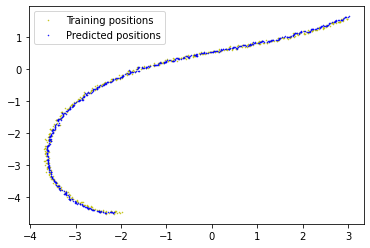

In [ ]:
### Plotting
position_actual = n_test_actual_pos1_no_noise

import matplotlib.pyplot as plt
import numpy as np

plt.plot(test_traj1[:,0:1], test_traj1[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted1[:,0:1], inverted_predicted1[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()

In [ ]:
# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj1[n_steps_in:,:]
predicted = inverted_predicted1

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(true, predicted)
print(mse1)

0.0348543231243448
0.0019353328312953551


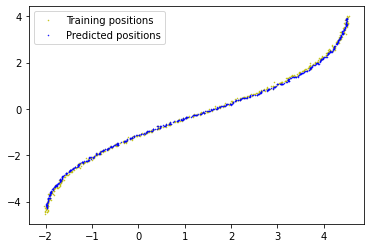

0.03870691219182303
0.0024612512748287655


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X2
inverted_predicted2 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler2.inverse_transform(position_predicted_temp)
  inverted_predicted2 = np.append(inverted_predicted2, inverted_predicted_temp)

inverted_predicted2 = inverted_predicted2.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_02.dat"
np.savetxt(path,inverted_predicted2)

### Plotting
position_actual = n_test_actual_pos2_no_noise

import matplotlib.pyplot as plt
import numpy as np

plt.plot(test_traj2[:,0:1], test_traj2[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted2[:,0:1], inverted_predicted2[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj2[n_steps_in:,:]
predicted = inverted_predicted2

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(true, predicted)
print(mse2)

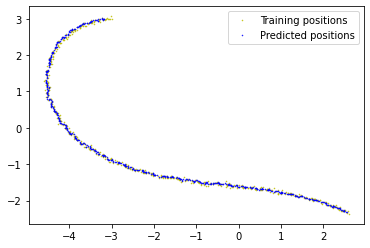

0.031407044108249835
0.0015844399093469523


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X3
inverted_predicted3 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler3.inverse_transform(position_predicted_temp)
  inverted_predicted3 = np.append(inverted_predicted3, inverted_predicted_temp)

inverted_predicted3 = inverted_predicted3.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_03.dat"
np.savetxt(path,inverted_predicted3)

### Plotting
position_actual = n_test_actual_pos3_no_noise

plt.plot(test_traj3[:,0:1], test_traj3[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted3[:,0:1], inverted_predicted3[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj3[n_steps_in:,:]
predicted = inverted_predicted3

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(true, predicted)
print(mse3)

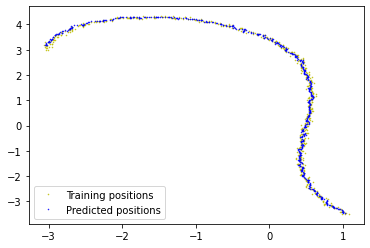

0.033174416913403115
0.0017522356818944495


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X4
inverted_predicted4 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler4.inverse_transform(position_predicted_temp)
  inverted_predicted4 = np.append(inverted_predicted4, inverted_predicted_temp)

inverted_predicted4 = inverted_predicted4.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_04.dat"
np.savetxt(path,inverted_predicted4)

### Plotting
position_actual = n_test_actual_pos4_no_noise

plt.plot(test_traj4[:,0:1], test_traj4[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted4[:,0:1], inverted_predicted4[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj4[n_steps_in:,:]
predicted = inverted_predicted4

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(true, predicted)
print(mse4)

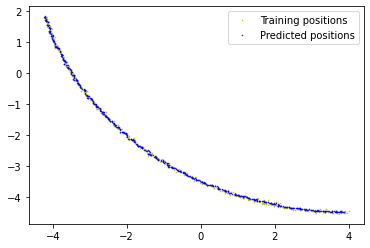

0.030639835470973466
0.001480779833102036


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X5
inverted_predicted5 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler5.inverse_transform(position_predicted_temp)
  inverted_predicted5 = np.append(inverted_predicted5, inverted_predicted_temp)

inverted_predicted5 = inverted_predicted5.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_05.dat"
np.savetxt(path,inverted_predicted5)

### Plotting
position_actual = n_test_actual_pos5_no_noise

plt.plot(test_traj5[:,0:1], test_traj5[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted5[:,0:1], inverted_predicted5[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj5[n_steps_in:,:]
predicted = inverted_predicted5

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(true, predicted)
print(mse5)

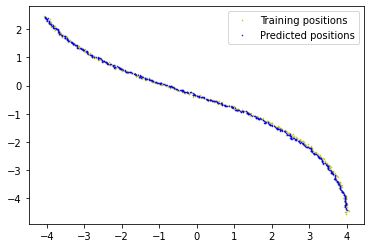

0.0350198579577231
0.001927393031067152


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X6
inverted_predicted6 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler6.inverse_transform(position_predicted_temp)
  inverted_predicted6 = np.append(inverted_predicted6, inverted_predicted_temp)

inverted_predicted6 = inverted_predicted6.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_06.dat"
np.savetxt(path,inverted_predicted6)

### Plotting
position_actual = n_test_actual_pos6_no_noise

plt.plot(test_traj6[:,0:1], test_traj6[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted6[:,0:1], inverted_predicted6[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj6[n_steps_in:,:]
predicted = inverted_predicted6

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse6 = mean_squared_error(true, predicted)
print(mse6)

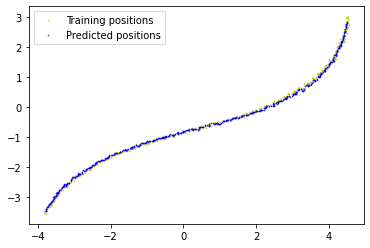

0.03450244247052894
0.0019315486642704639


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X7
inverted_predicted7 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler7.inverse_transform(position_predicted_temp)
  inverted_predicted7 = np.append(inverted_predicted7, inverted_predicted_temp)

inverted_predicted7 = inverted_predicted7.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_07.dat"
np.savetxt(path,inverted_predicted7)

### Plotting
position_actual = n_test_actual_pos7_no_noise

plt.plot(test_traj7[:,0:1], test_traj7[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted7[:,0:1], inverted_predicted7[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj7[n_steps_in:,:]
predicted = inverted_predicted7

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse7 = mean_squared_error(true, predicted)
print(mse7)

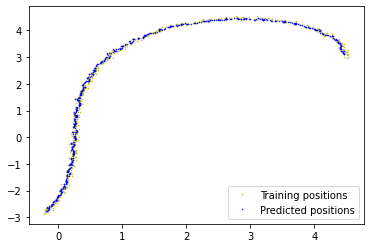

0.03787670543022015
0.0022787633278362526


In [ ]:
# demonstrate prediction, NOISE
x_input = test_X8
inverted_predicted8 = np.array([])

for x in x_input:
  x = x.reshape((1, n_steps_in, n_features))
  yhat = model.predict(x, verbose=0)
  position_predicted_temp = np.squeeze(yhat,axis=0)
  inverted_predicted_temp = test_scaler8.inverse_transform(position_predicted_temp)
  inverted_predicted8 = np.append(inverted_predicted8, inverted_predicted_temp)

inverted_predicted8 = inverted_predicted8.reshape((x_input.shape[0], 2))

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/predicted_path_08.dat"
np.savetxt(path,inverted_predicted8)

### Plotting
position_actual = n_test_actual_pos8_no_noise

plt.plot(test_traj8[:,0:1], test_traj8[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted8[:,0:1], inverted_predicted8[:,1:2], "ob", label='Predicted positions', markersize=0.5)
plt.legend()
plt.show()


# Calculating the MAE with a custom function
import numpy as np

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_traj8[n_steps_in:,:]
predicted = inverted_predicted8

print(mae(true, predicted))

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse8 = mean_squared_error(true, predicted)
print(mse8)

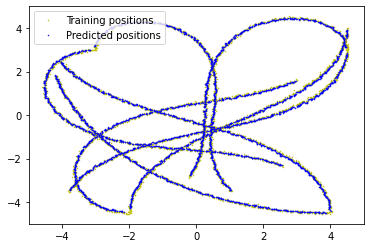

NameError: ignored

In [ ]:
### Plotting All
import matplotlib.pyplot as plt
import numpy as np

plt.plot(test_traj1[:,0:1], test_traj1[:,1:2], "oy", label='Training positions', markersize=0.5)
plt.plot(inverted_predicted1[:,0:1], inverted_predicted1[:,1:2], "ob", label='Predicted positions', markersize=0.5)

plt.plot(test_traj2[:,0:1], test_traj2[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted2[:,0:1], inverted_predicted2[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj3[:,0:1], test_traj3[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted3[:,0:1], inverted_predicted3[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj4[:,0:1], test_traj4[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted4[:,0:1], inverted_predicted4[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj5[:,0:1], test_traj5[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted5[:,0:1], inverted_predicted5[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj6[:,0:1], test_traj6[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted6[:,0:1], inverted_predicted6[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj7[:,0:1], test_traj7[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted7[:,0:1], inverted_predicted7[:,1:2], "ob", markersize=0.5)

plt.plot(test_traj8[:,0:1], test_traj8[:,1:2], "oy", markersize=0.5)
plt.plot(inverted_predicted8[:,0:1], inverted_predicted8[:,1:2], "ob", markersize=0.5)

plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

print("MSE_path1=",mse1)
print("MSE_path2=",mse2)
print("MSE_path3=",mse3)
print("MSE_path4=",mse4)
print("MSE_path5=",mse5)
print("MSE_path6=",mse6)
print("MSE_path7=",mse7)
print("MSE_path8=",mse8)



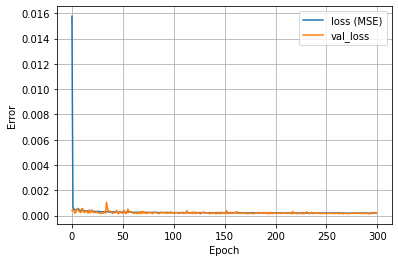

In [ ]:
import matplotlib.pyplot as plt
model = history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss (MSE)')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/loss_plot_train_loss.dat"
np.savetxt(path,history.history['loss'])

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_path_pred/loss_plot_val_loss.dat"
np.savetxt(path,history.history['val_loss'])

# **REGRESSION MODEL**

In [2]:
# regression mlp model for the abalone dataset
import numpy as np
import h5py
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

reg_mat_var_0_03_test_01 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/REG_POS_IDC_W_var_0_03_test_01.mat','r')
reg_mat_var_0_03_test_02 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/REG_POS_IDC_W_var_0_03_test_02.mat','r')
reg_mat_var_0_03_test_03 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/REG_POS_IDC_W_var_0_03_test_03.mat','r')
reg_mat_var_0_03_test_04 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/REG_POS_IDC_W_var_0_03_test_04.mat','r')

# Load Data
position_var_0_03_train_01 = np.array(reg_mat_var_0_03_test_01['POS_REG'])
position_var_0_03_train_02 = np.array(reg_mat_var_0_03_test_02['POS_REG'])
position_var_0_03_train_03 = np.array(reg_mat_var_0_03_test_03['POS_REG'])
position_var_0_03_train_04 = np.array(reg_mat_var_0_03_test_04['POS_REG'])

IDC_W_opt_var_0_03_train_01 = np.array(reg_mat_var_0_03_test_01['IDC_W_REG'])
IDC_W_opt_var_0_03_train_02 = np.array(reg_mat_var_0_03_test_02['IDC_W_REG'])
IDC_W_opt_var_0_03_train_03 = np.array(reg_mat_var_0_03_test_03['IDC_W_REG'])
IDC_W_opt_var_0_03_train_04 = np.array(reg_mat_var_0_03_test_04['IDC_W_REG'])

# Transpose
position_var_0_03_train_01 = position_var_0_03_train_01.transpose()
position_var_0_03_train_02 = position_var_0_03_train_02.transpose()
position_var_0_03_train_03 = position_var_0_03_train_03.transpose()
position_var_0_03_train_04 = position_var_0_03_train_04.transpose()

IDC_W_opt_var_0_03_train_01 = IDC_W_opt_var_0_03_train_01.transpose()
IDC_W_opt_var_0_03_train_02 = IDC_W_opt_var_0_03_train_02.transpose()
IDC_W_opt_var_0_03_train_03 = IDC_W_opt_var_0_03_train_03.transpose()
IDC_W_opt_var_0_03_train_04 = IDC_W_opt_var_0_03_train_04.transpose()

position = np.concatenate((position_var_0_03_train_02, position_var_0_03_train_03, position_var_0_03_train_04), axis=0)
IDC_W_opt = np.concatenate((IDC_W_opt_var_0_03_train_02, IDC_W_opt_var_0_03_train_03, IDC_W_opt_var_0_03_train_04), axis=0)

#print(position)

In [3]:
X_train, y_train = position, IDC_W_opt

In [44]:
#X_test = np.concatenate((inverted_predicted1, inverted_predicted2, inverted_predicted3, inverted_predicted4, inverted_predicted5, inverted_predicted6, inverted_predicted7, inverted_predicted8), axis=1)
#y_test = IDC_W_opt_var_0_03_train_01[n_steps_in:,:]

X_test = position_var_0_03_train_04
y_test = IDC_W_opt_var_0_03_train_04

#X_test = position_var_0_03_train_02
#y_test = IDC_W_opt_var_0_03_train_02

n_features = X_train.shape[1]
n_output_dim = y_train.shape[1]

In [20]:
#%%timeit
# define the keras model
Reg_model = Sequential()
Reg_model.add(Dense(200, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
Reg_model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
Reg_model.add(Dense(50, kernel_initializer='normal', activation='relu'))
Reg_model.add(Dense(n_output_dim, activation='linear'))

# compile the keras model
Reg_model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
Reg_model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

In [ ]:
# Structure of REGRESSION NN
from keras.utils.vis_utils import plot_model
plot_model(Reg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%%timeit
# evaluate on test set
yhat = Reg_model.predict(X_test)

In [ ]:
# evaluate on test set
yhat = Reg_model.predict(X_test)

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_REG/predicted_REG_IDC_W_OPT_without_pathPrediction.dat"
np.savetxt(path,yhat)


# Calculating the MSE with sklearn
mae_reg = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae_reg)

# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
mse_reg = mean_squared_error(y_test, yhat)
print('MSE: %.5f' % mse_reg)

# Structure of REGRESSION NN
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

18/18 [==============================] - 0s 2ms/step


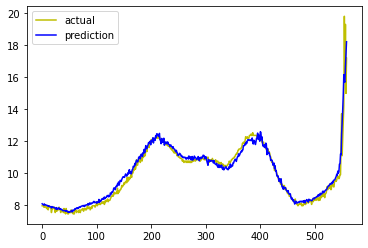

In [45]:
# evaluate on test set
yhat = Reg_model.predict(X_test)

path = "/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_W_BLOCKAGE/DATA_REG/predicted_REG_IDC_W_OPT_without_pathPrediction.dat"
np.savetxt(path,yhat)


# Plotting
import matplotlib.pyplot as plt
import numpy as np

# Call BF Results
#BF_var_0_03 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_steps_25/I_DC_opt_ZF_BF.mat','r')
#BF_total_IDC = np.array(BF_var_0_03['I_DC_opt_ZF'])
#BF_total_IDC = BF_total_IDC.transpose()

Y_TEST = y_test[:,0:4]
Y_TEST_sum = Y_TEST.sum(axis=1)

Y_HAT = yhat[:,0:4]
Y_HAT_sum = Y_HAT.sum(axis=1)


plt.plot(Y_TEST_sum, "-y", label='actual')
plt.plot(Y_HAT_sum, "-b", label='prediction')
#plt.plot(BF_total_IDC, "-r", label='BF')

#plt.plot(yhat[:,1], "-b", label='prediction')
#plt.plot(y_test[:,1], "--b", label='actual')

#plt.plot(yhat[:,2], "-g", label='prediction')
#plt.plot(y_test[:,2], "--g", label='actual')

#plt.plot(yhat[:,3], "-r", label='prediction')
#plt.plot(y_test[:,3], "--r", label='actual')

#plt.plot(test_traj8[:,0:1], test_traj8[:,1:2], "oy", markersize=5)
#plt.plot(inverted_predicted8[:,0:1], inverted_predicted8[:,1:2], "ob", markersize=5)

plt.legend()
#plt.xlim([-5, 5])
#plt.ylim([-5, 5])
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

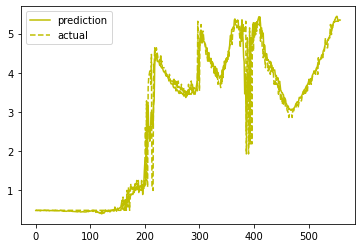

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(yhat[:,0], "-y", label='prediction')
plt.plot(y_test[:,0], "--y", label='actual')
plt.legend()
plt.show

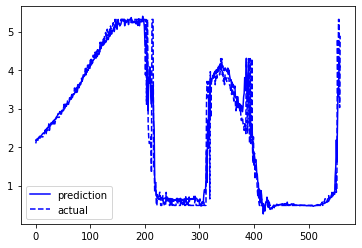

In [ ]:
plt.plot(yhat[:,1], "-b", label='prediction')
plt.plot(y_test[:,1], "--b", label='actual')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

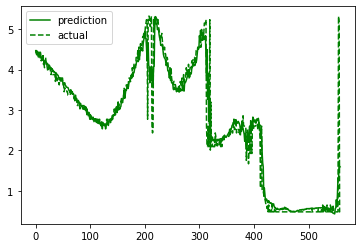

In [ ]:
plt.plot(yhat[:,2], "-g", label='prediction')
plt.plot(y_test[:,2], "--g", label='actual')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

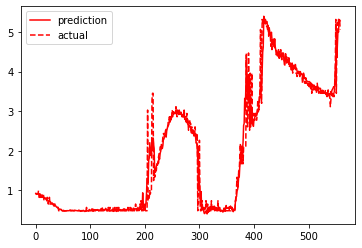

In [ ]:
plt.plot(yhat[:,3], "-r", label='prediction')
plt.plot(y_test[:,3], "--r", label='actual')
plt.legend()
plt.show

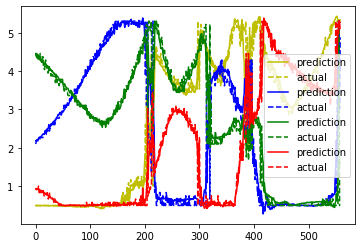

In [ ]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.plot(yhat[:,0], "-y", label='prediction')
plt.plot(y_test[:,0], "--y", label='actual')

plt.plot(yhat[:,1], "-b", label='prediction')
plt.plot(y_test[:,1], "--b", label='actual')

plt.plot(yhat[:,2], "-g", label='prediction')
plt.plot(y_test[:,2], "--g", label='actual')

plt.plot(yhat[:,3], "-r", label='prediction')
plt.plot(y_test[:,3], "--r", label='actual')

#plt.plot(test_traj8[:,0:1], test_traj8[:,1:2], "oy", markersize=5)
#plt.plot(inverted_predicted8[:,0:1], inverted_predicted8[:,1:2], "ob", markersize=5)

plt.legend()
#plt.xlim([-5, 5])
#plt.ylim([-5, 5])
plt.show()



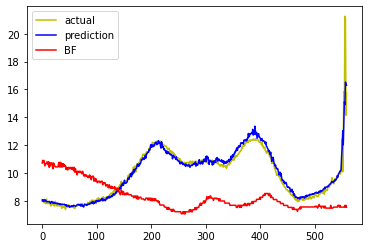

In [ ]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np

# Call BF Results
BF_var_0_03 = h5py.File('/content/drive/MyDrive/VLC/LSTM_Regression/Tuning/Regression/TEST_IDC_steps_25/I_DC_opt_ZF_BF.mat','r')
BF_total_IDC = np.array(BF_var_0_03['I_DC_opt_ZF'])
BF_total_IDC = BF_total_IDC.transpose()

Y_TEST = y_test[:,0:4]
Y_TEST_sum = Y_TEST.sum(axis=1)

Y_HAT = yhat[:,0:4]
Y_HAT_sum = Y_HAT.sum(axis=1)


plt.plot(Y_TEST_sum, "-y", label='actual')
plt.plot(Y_HAT_sum, "-b", label='prediction')
plt.plot(BF_total_IDC, "-r", label='BF')

#plt.plot(yhat[:,1], "-b", label='prediction')
#plt.plot(y_test[:,1], "--b", label='actual')

#plt.plot(yhat[:,2], "-g", label='prediction')
#plt.plot(y_test[:,2], "--g", label='actual')

#plt.plot(yhat[:,3], "-r", label='prediction')
#plt.plot(y_test[:,3], "--r", label='actual')

#plt.plot(test_traj8[:,0:1], test_traj8[:,1:2], "oy", markersize=5)
#plt.plot(inverted_predicted8[:,0:1], inverted_predicted8[:,1:2], "ob", markersize=5)

plt.legend()
#plt.xlim([-5, 5])
#plt.ylim([-5, 5])
plt.show()

